In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.load('data.npy')

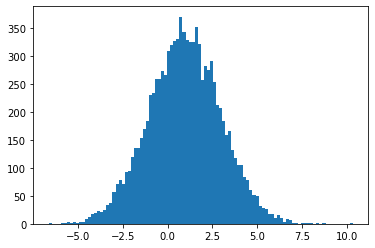

In [3]:
plt.hist(data, bins=100)
plt.show()

<div style="direction:rtl">شاید در اولین نگاه به توزیع بالا خیلی شبیه توزیع نرمال به چشم ما آید از آنجایی که توزیع آن یکسان نیست و بیشتر احتمالات در اطراف قله ی مرکزی هستند و به مرور کاهش میابد. اما یکی از بزرگترین مشخصه های توزیع نرمال تقارن آن نسبت به قله ی آن است که همانطور که مشاهده میکنیم در این نمودار این تقارن خیلی دقیق وجود ندارد. برنابراین توزیع آن میتواند توزیع بتا از توزیع های پیوسته باشد که الفا و بتای آن تفاوت خیلی زیادی نداشته باشند. چون در صورتی که کاملا یکسان باشد توزیع آن با توزیع نرمال یکسان میشود. پس تفاوت کم آن میتواند عدم تقارن کامل نمودار را توجیه کند. </div>
<div style="direction:rtl">برای اطمینان از حدس زده شده با استفاده از لایبرری fitter میتوان از درستی به شکل زیرا اطمینان حاصل کرد
</div>

In [4]:
from fitter import Fitter

,sumsquare_error,aic,bic,kl_div
beta,0.003079,948.554594,-149898.513932,inf
norm,0.003088,943.718167,-149887.953414,inf


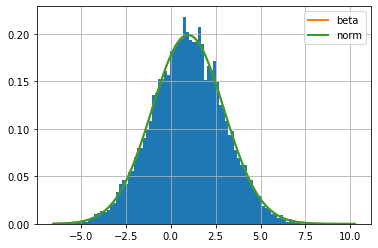

In [5]:
f = Fitter(data,
           distributions=[ "beta",
                          "norm"])
f.fit()
f.summary()

In [6]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 7330753.934934409,
  'b': 261035.68069739593,
  'loc': -29260.497673988182,
  'scale': 30303.402671305805}}

<div style="direction:rtl">دو راه برای استاندارد کردن داریم یکی اینکه با توجه به فرمول خودمان این عملیات را انجام دهیم و دیگر اینکه از لایبری های موجود استفاده کنیم که هر دو روش نوشته شده است. ابتدا با استفاده از لایبرری و بعد با محاسبات با توجه به فرمول برای صفر کردن میانگین و یک کردن انحراف معیار</div>

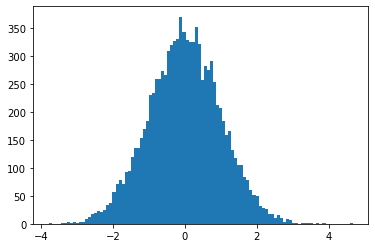

In [7]:
#first solution
#Normalize the data
normalize_data=((data-data.min())/(data.max()-data.min()))
#Standardize the data
data_standard=((normalize_data-normalize_data.mean())/(normalize_data.std()))
plt.hist(data_standard, bins=100)
plt.show()

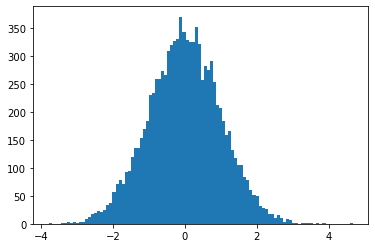

In [8]:
#second solution
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scaled_data = scale.fit_transform(data.reshape(-1, 1)) 
plt.hist(scaled_data, bins=100)
plt.show()

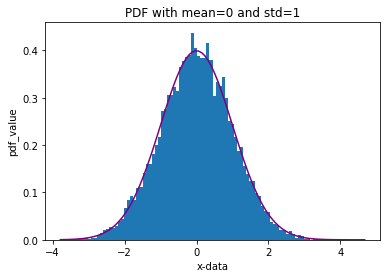

In [9]:
from scipy import stats

x = np.linspace(data_standard.min(), data_standard.max(), 100)
y = stats.norm.pdf(x, data_standard.mean(), data_standard.std())#data_standard.mean=0,data_standard.std()=1
plt.hist(data_standard, 100, density=True)
plt.plot(x, y, "purple")
plt.xlabel('x-data')
plt.ylabel('pdf_value')
plt.title("PDF with mean=0 and std=1")
plt.show()

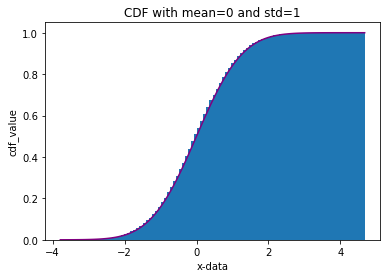

In [10]:
x = np.linspace(data_standard.min(), data_standard.max(), 100)
y = stats.norm.cdf(x, data_standard.mean(), data_standard.std())#data_standard.mean=0,data_standard.std()=1
plt.hist(data_standard, 100, density=True, cumulative=True)
plt.plot(x, y, "purple")
plt.xlabel('x-data')
plt.ylabel('cdf_value')
plt.title("CDF with mean=0 and std=1")
plt.show()

both PDF And CDF almost match the histogram